In [17]:
import pandas as pd
dataIncome=pd.read_csv("https://raw.githubusercontent.com/CUSP2021ADS/Data/main/MeanZIP.csv",index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


In [18]:
data311 = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/aggr311.csv' , index_col=0 )
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [19]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome1 = DataIncome1[['Median']].reset_index(drop=False)
DataIncome1 = DataIncome1.rename({'Zip':'ZIPCODE'},axis=1)
DataIncome1.head()

,ZIPCODE,Median
0,10001.0,71244.6100
1,10002.0,30843.9574
2,10003.0,89998.5339
3,10004.0,110183.6857
4,10005.0,115133.2855


In [20]:
import geopandas as gpd

nyc_zip = gpd.read_file("ZIP_CODE_040114.shp")
nyc_zip = nyc_zip.to_crs(epsg=4326)

nyc_zip['ZIPCODE'] = nyc_zip['ZIPCODE'].astype('int')
DataIncome1['ZIPCODE'] = DataIncome1['ZIPCODE'].astype('int')




# Merge shapefile and median income data
nyc_zip_codes_income = nyc_zip.merge(DataIncome1, on="ZIPCODE")

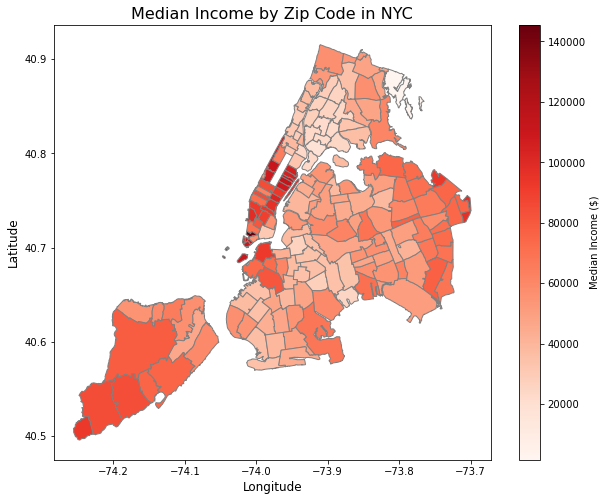

In [32]:
import matplotlib.pyplot as plt

# Define 3 quantiles for color coding
q1 = nyc_zip_codes_income["Median"].quantile(0.33)
q2 = nyc_zip_codes_income["Median"].quantile(0.66)

# Create choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
nyc_zip_codes_income.plot(column="Median", ax=ax, cmap="Reds", edgecolor="grey",
                          legend=True, legend_kwds={"label": "Median Income ($)"})

# Color code by quantiles
#nyc_zip_codes_income[nyc_zip_codes_income["Median"] <= q1].plot(ax=ax, color="aqua")
#nyc_zip_codes_income[(nyc_zip_codes_income["Median"] > q1) & (nyc_zip_codes_income["Median"] <= q2)].plot(ax=ax, color="salmon")
#nyc_zip_codes_income[nyc_zip_codes_income["Median"] > q2].plot(ax=ax, color="mediumsalmon")

# Add title and labels
ax.set_title("Median Income by Zip Code in NYC", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.show()